**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Fall 2021; Prof. V. F. de Almeida

# Title: FUEL PLATE (A One-Dimensional Fuel-Reflector Core with Fast Reactor Material)
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  `Ankit Mishra and Joseph Boffie` <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentors and Collaborators:** `Prof. Sukesh Aghara and Prof. de Almeida Valmor`

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**22Nov2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Tests](#tests)
 + [Setup](#setup)
   - [Test 1](#1dsolofueldirichlet)
   - [Test 2](#1dsolofueldirichletrobin)
* [2-D Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

The neutron flux profile of a one-dimensional slab reactor was analysed in this work.
Fast reactor material cross-sections were used for this simulation.
Without specification of the Power level, the computed neutron flux was normalized to 1 at the center of the core.
For this problem, an analytical solution exist.
However, for the purpose of this work, only the hand-calculated FEM solution implemented in Jupyter notebook and the FEM results from the MOOSE app will be compared.

## [Problem Statement](#toc)<a id="problem"></a>

The general Poisson problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'\bigr)'(x) + S(x)\,u(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
\end{align*}
        with some defined boundary conditions
   
    For the current 1D slab reflected reactor, the equations for the core and reflector regions can be defined as:
        Core Region: 
       
\begin{align*}
 u''(x) + B^2\,u(x) &= 0 \quad\quad \forall \quad\quad x\in [0,a/2], \\
\end{align*}


        
         and for the reflector region: 
         
\begin{align*}
  u''(x) - L^{-2}\,u(x) &= 0 \quad\quad \forall \quad\quad x\in [a/2,h], \\
\end{align*}

Comparing the equations for the core and reflector with the poissons equation, we find that

\begin{align*}
D = 1, (not the Diffusion coefficient)\\
f(x) &= 0 \\
S(x) = B^2 ; for core region \\
      =L^{-2};in the reflector region \\
\end{align*}
        
         with boundary conditions:
         u'(0) = 0 
         u(h) = 0 (for FEM method, a very small value ~E-12)

         
####  *The geometric and the material properties of the fast reactor core is as follows:*
         
        

**Reactor Description**
|Description   |Data                             |
|--------------|---------------------------------|
|Core:         |   50% Na, 30% Fuel, 20% SS      |
|Reflector     |   15% PuO2, 85% UO2             |
|Fuel          |    70% Na, 30% SS               |


**Core Material Data:**
|Description                      |Data                                        |
|---------------------------------|--------------------------------------------|
|v*Fission_Cross_Section          |   7.15E-3                                  |
|Fission_Cross_Section            |   2.42E-3                                  |
|Absorbtion_Cross_Section         |   5.17E-3                                  |
|Diffusion_Length                 |   2.08 # in cms                            |



**Reflector Material Data:**
|Description               |Data                 |
|--------------------------|---------------------|
|Absorbtion_Cross_Section  | 2.48E-4 # in per cm |
|Diffusion_Length          |2.22 # in cms        |
|Migration_Length          |9.47E1 # in cms      |


**Geometry**

|Description      |Data                  |
|-----------------|----------------------|
|Core Size        | 50 # in cms          |
|B^2              | 4.13E-4              |
|Reflector Size   | 3 * Migration_Length |


### Domain

![Domain](/pics/domain.png)

In [1]:
'''Domain'''

x_a = 0
x_b = 300
a=25
l_2 =94.701
source_slope_value = 4.13e-4

In [2]:
def show_domain(screenshot=False):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = 1
    radius_o = 20 * radius_i
    outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
    inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

    plo = pv.Plotter(notebook=True, shape=(1,1)) 
    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.99,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')

    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')

## [Objectives](#toc)<a id="obj"></a>

To analyse the solution profile of a reflected slab reactor using different solution methods.

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 


The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_i,\phi'_j) + (S\,\phi_i,\phi_j) $
  + $b_i = - (D\,w',\phi'_i) + (S\,w,\phi_i) $

### [MOOSE Kernels](#toc)<a id="kernels"></a>


### [Tests](#toc)<a id="tests"></a>


### [Setup](#toc)<a id="setup"></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve
from scipy.integrate import quad
from numpy.linalg import matrix_rank
import math
import scipy

In [4]:
'''Parameters'''
diff_coeff = 1
source_bias_value = 0
source_slope_value = 4.13e-4

In [5]:
'''Defined Functions'''

def get_domain_partition(degree, n_elem, x_min, x_max, bc_x_min='essential', bc_x_max=''):
    assert degree == 1
    # Local node numbering on parent domain
    # --0--------------1---->
    #  -1      0      +1    zeta
    gnodes_x = np.linspace(x_min, x_max, n_elem+1, dtype=np.float64)
    patches = list()
    local_to_global_node_id_map = []
    for e in range(n_elem):
        gnode_id_2 = e + 1            # right
        gnode_id_1 = gnode_id_2 - 1   # left
        x1 = gnodes_x[gnode_id_1]
        x2 = gnodes_x[gnode_id_2]
        # Local node id:  0   1
        patches.append((x1, x2))
        # Local node id:                        0           1
        local_to_global_node_id_map.append([gnode_id_1, gnode_id_2])
    if bc_x_min == 'essential':
        local_to_global_node_id_map[0][0] = -1
    if bc_x_max == 'essential':
        local_to_global_node_id_map[-1][-1] = -1
    return (patches, gnodes_x, local_to_global_node_id_map)

def get_parent_mapping():
    # zeta in [-1,1]
    parent_mapping = lambda zeta, x_e_bar, h_e: x_e_bar + h_e/2*zeta # compute x
    parent_mapping_prime = lambda h_e: h_e/2# compute mapping derivative wrt zeta
    # x in Omega_e
    inverse_parent_mapping = lambda x, x_e_bar, h_e: (x - x_e_bar)*2/h_e # compute zeta
    inverse_parent_mapping_prime = lambda h_e: 2/h_e # compute zeta
    #inverse_parent_mapping_der = 
    return (parent_mapping, parent_mapping_prime, inverse_parent_mapping, inverse_parent_mapping_prime)

def get_parent_basis_functions():
    parent_basis_func_list = list()
    parent_basis_func_prime_list = []
    parent_basis_func_list.append(lambda zeta: -(zeta-1)/2)  # left
    parent_basis_func_list.append(lambda zeta:  (zeta+1)/2)  # right
    parent_basis_func_prime_list.append(lambda zeta: -1/2) # left
    parent_basis_func_prime_list.append(lambda zeta:  1/2) # right
    return (parent_basis_func_list, parent_basis_func_prime_list)

def global_basis_function(i, x, domain_partition, parent_mapping, parent_basis_functions):
    """Evaluate the ith global FE basis function and its derivative on x points.
    
    This is never needed in practice. It is here for demonstrating the theory.
    """
    try:
        len(x)
    except TypeError:
        x = np.array([x])
  
    if not isinstance(x, np.ndarray):
       assert isinstance(x, list) or isinstance(x, tuple)
       x = np.array(x)
  
    phi_i_x = np.copy(x) * 0.0 # initialization
    phi_prime_i_x = np.copy(x) * 0.0 # initialization
        
    patches = domain_partition[0]
    local_to_global_node_id_map = domain_partition[2]
    inverse_parent_mapping = parent_mapping[2]
    inverse_parent_mapping_prime = parent_mapping[3]
    parent_basis_func_list = parent_basis_functions[0]
    parent_basis_func_prime_list = parent_basis_functions[1]
  
    # expensive reverse lookup
    for j, x_j in enumerate(x):
        for e, nodes_x in enumerate(patches):
            if nodes_x[0] <= x_j <= nodes_x[1]:
                n_lnodes = len(nodes_x)
                for I in range(n_lnodes):
                    if local_to_global_node_id_map[e][I] == i:
                        x_e_bar = (nodes_x[0] + nodes_x[1])/2 
                        h_e = nodes_x[1] - nodes_x[0]
                        zetta = inverse_parent_mapping(x_j, x_e_bar, h_e)
                        d_zetta = inverse_parent_mapping_prime(h_e)
                        
                        phi_i_x[j] = parent_basis_func_list[I](zetta)
                        phi_prime_i_x[j] = parent_basis_func_prime_list[I](d_zetta)
                break
    return [phi_i_x, phi_prime_i_x]

def get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function):
    
    basis_func_list = list()
    basis_func_prime_list = []
    n_gnodes = domain_partition[1].size

    local_to_global_node_id_map = domain_partition[2]

    phi_i = lambda i, x: global_basis_function(i,x, domain_partition, parent_mapping, parent_basis_functions)[0]
    phi_prime_i = lambda i, x: global_basis_function(i,x, domain_partition, parent_mapping, parent_basis_functions)[1]

    visited = [False]*n_gnodes
    for e in range(n_elem):
        for I in range(len(local_to_global_node_id_map[e])):
            gnode_id = local_to_global_node_id_map[e][I]
            if gnode_id >= 0 and not visited[gnode_id]:
                      basis_func_list.append(lambda x, i=gnode_id: phi_i(i,x))
                      basis_func_prime_list.append(lambda x, i=gnode_id: phi_prime_i(i,x))
                      visited[gnode_id] = True

    assert len(basis_func_list) >= 1, 'There are no basis functions to build.'

    return [basis_func_list, basis_func_prime_list]

def plot(title='Lagrange Basis Functions'):
    
    import matplotlib.pyplot as plt
    #%matplotlib inline
    plt.style.use('classic')
    plt.figure(1, figsize=(14, 5))

    npts = 200
    x_pts = np.linspace(x_a, x_b, npts)
    for (i,phi_i) in enumerate(phi_list):
        plt.plot(x_pts, phi_i(x_pts),'-',label=r'$\phi_%i$'%i)

    gnodes_x = domain_partition[1]
    plt.scatter(gnodes_x, np.zeros(gnodes_x.size), color='red', marker='x', s=80, label='nodes')

    plt.title(title, fontsize=20)
    plt.ylabel(r'$\phi_i(x)$', fontsize=18)
    plt.xlabel(r'$x$', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='best',fontsize=12)
    plt.grid(True)
    plt.show()

def FourierBasis(x,N,shift_fourier,Kappa):
    function=np.zeros((len(x),2*N+1))
    for i in range (len(x)):
        for j in range((2*N+1)):
            if (j==0):
                function[i,j]=1
            elif (j%2)==1:
                function[i,j]=np.cos(((j//2)+1)*Kappa*(x[i]-shift_fourier))
            elif (j%2)==0:
                function[i,j]=np.sin((j//2)*Kappa*(x[i]-shift_fourier))
    return np.array(function)

def Plot(function,x_pts):
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(5)
    plt.style.use('classic')
    for i in range(len(function[0])):
        if i==0:
            plt.plot(x_pts,function[:,0],label='1')
        elif i%2==1:
            plt.plot(x_pts,function[:,i], label=r'$cos$(%ik(${x}$ - $\bar{x}$))'%(((i/2)+0.5)))
        elif i % 2 == 0:
            plt.plot(x_pts,function[:,i], label=r'$sin$(%ik(${x}$ - $\bar{x}$))'%(i/2))
        for _ in range(len(function[0])//2):
            plt.legend( bbox_to_anchor=(1.05, 1.0),loc='best')
    plt.xlabel(r'$X$',fontsize = 19)
    plt.ylabel(r'$Cos x, Sin x$',fontsize=19)
    plt.title('Fourier basis func at Mode = %i'%N, fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    return plt.show()

def plot_func(domain_partition, phi_list, x_min,x_max,title='Lagrange Basis Functions'):
    import matplotlib.pyplot as plt

    plt.style.use('classic')
    plt.figure(1, figsize=(14, 5))

    npts = 500
    x_pts = np.linspace(x_min, x_max, npts)
    # x_pts = domain_partition[1]
    for (i, phi_i) in enumerate(phi_list):
        plt.plot(x_pts, phi_i(x_pts), '-', label=r'$\phi_{%i}$' % i)

    gnodes_x = domain_partition[1]
    plt.scatter(gnodes_x, np.zeros(gnodes_x.size), color='red', marker='x', s=80, label='nodes')

    plt.title(title, fontsize=20)
    plt.ylabel(r'$\phi_i(x)$', fontsize=18)
    plt.xlabel(r'$x$', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

'''Pedagogical inner product'''

from scipy.integrate import quad

def inner_product(u, v, patches):
    integrand = lambda x: u(x) * v(x)          
    inner_product = 0.0
    for nodes_x in patches:
        (inner_product_e, _) = quad(integrand, nodes_x[0], nodes_x[1],limit=100)
        inner_product += inner_product_e           
    return inner_product



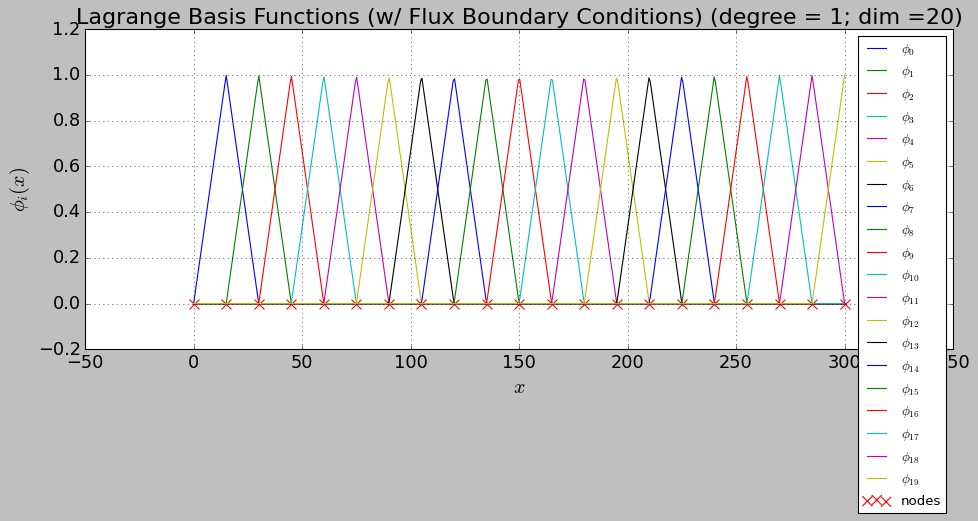

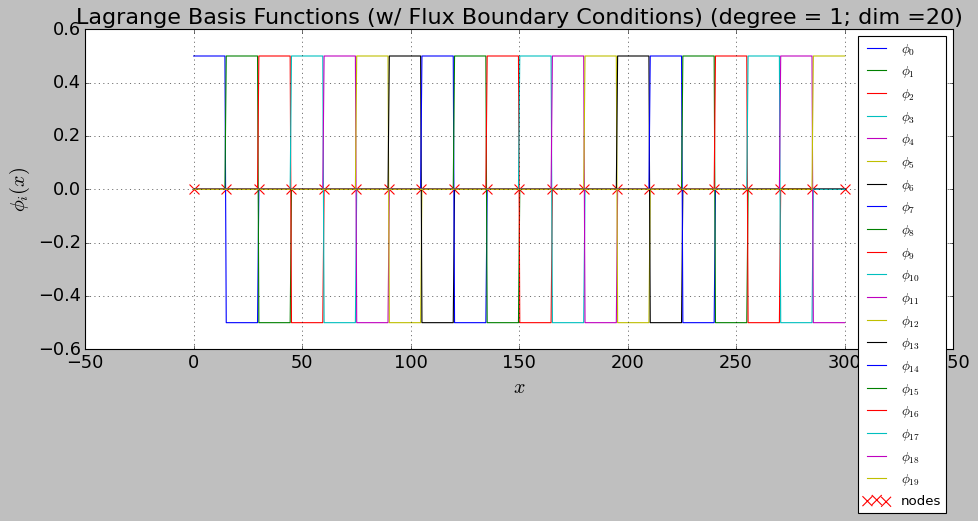

In [6]:
degree = 1
n_elem = 20 #Number of elements used

domain_partition = get_domain_partition(degree, n_elem, x_a, x_b)
parent_mapping = get_parent_mapping()
parent_basis_functions = get_parent_basis_functions()

phi_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[0]

phi_prime_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[1]

plot_func(domain_partition,phi_list,x_a,x_b,title=r'Lagrange Basis Functions (w/ Flux Boundary Conditions) (degree = %i; dim =%i'%(degree, len(phi_list))+')')

plot_func(domain_partition,phi_prime_list,x_a,x_b,title=r'Lagrange Basis Functions (w/ Flux Boundary Conditions) (degree = %i; dim =%i'%(degree, len(phi_list))+')')



In [7]:
'''Build the coefficients of the lift function'''
import numpy as np

def source_slope(x,a,source_slope_value):
    if isinstance(x,(list,np.ndarray)):
        source_s=np.zeros(len(x))
        for i, j in enumerate(x):
            source_s[i] = source_slope_value if (j<=a) else -1/((l_2*.1)**2)
    elif isinstance(x,(int,float)):
        source_s =  source_slope_value if (x<=a) else -1/((l_2*.1)**2)
    else:
        print("This function only takes array as input")
    return source_s


u_b=1e-12
alpha_vec = np.zeros(len(phi_list))
alpha_vec[-1] = u_b


In [8]:
'''Build the lift function'''
n_pts = 500
x = np.linspace(x_a, x_b, n_pts)

def w_lift(x):
    if isinstance(x,(list,np.ndarray)):
        a_mtrx = np.zeros((len(x),len(phi_list)))
    elif isinstance(x,(int,float)):
        a_mtrx = np.zeros((len(phi_list)))
    for i, phi_i in enumerate(phi_list):
        if isinstance(x,(list,np.ndarray)):
            for j,x_j in enumerate(x):
                a_mtrx[j,i] = phi_i(x_j)
        elif isinstance(x, (int, float)):
            a_mtrx[i]=phi_i(x)
    return a_mtrx@alpha_vec

'''Build the lift function derivative'''

def w_lift_prime(x):
    a_mtrx = np.zeros(len(phi_prime_list))
    for i, phi_i in enumerate(phi_prime_list):
        a_mtrx[i] = phi_i(x)
    return a_mtrx@alpha_vec


In [9]:
'''Test boundary values'''

print('w(b) = ', w_lift(x_b))


w(b) =  1e-12


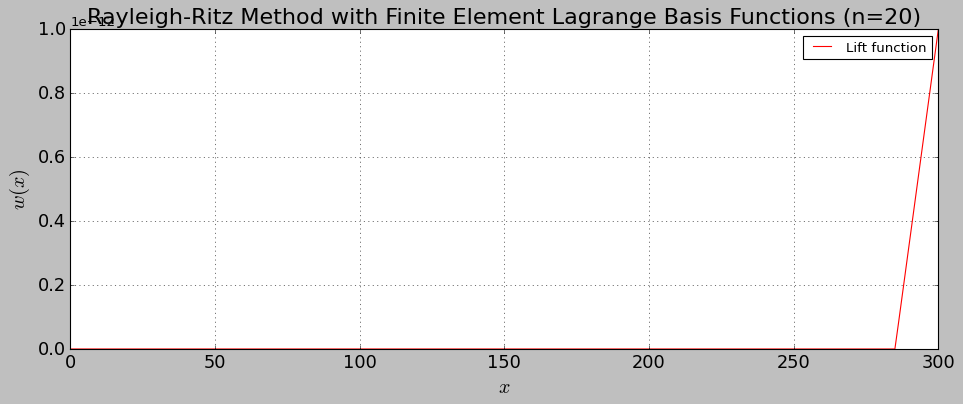

In [10]:
'''Rayleigh Ritz Method with FEM Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = w_lift(x)


import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x, u_values, 'r-', label='Lift function')

plt.title(r'Rayleigh-Ritz Method with Finite Element Lagrange Basis Functions (n='+str(len(phi_list))+')', fontsize=20)
plt.ylabel(r'$w(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

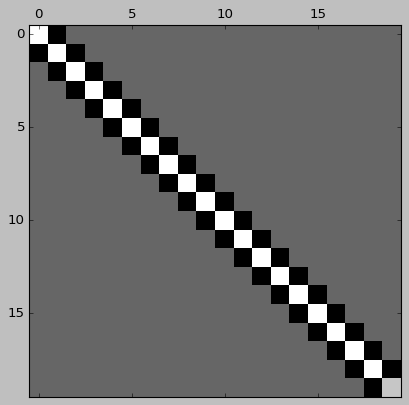

In [11]:
'''Build the matrix of coefficients of the linear system'''

import numpy as np
n = len(phi_list)
a_mtrx = np.zeros((n, n), dtype=np.float64)

# Diffusion
for i,phi_prime_i in enumerate(phi_prime_list):
    for j,phi_prime_j in enumerate(phi_prime_list):
        a_ij = inner_product(phi_prime_j, phi_prime_i,domain_partition[0])
        a_mtrx[i,j] = a_ij * diff_coeff


# Source        
for i,phi_i in enumerate(phi_list):
    for j,phi_j in enumerate(phi_list):
        s_x_phi_i = lambda x: source_slope(x,a,source_slope_value) * phi_i(x)
        a_ij = inner_product(s_x_phi_i, phi_j, domain_partition[0])
        a_mtrx[i,j] -= a_ij

#print(a_mtrx)
import matplotlib.cm as cm
plt.matshow(a_mtrx,interpolation='nearest',cmap=cm.Greys_r)
plt.show()

In [12]:
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

A is full rank.


In [13]:
'''Build load vector'''

b_vec = np.zeros(n, dtype=np.float64)
q_nb = -0.5



for i, phi_i in enumerate(phi_list):
    # Source bias
    # b_vec[i] = inner_product(source_bias, phi_i,domain_partition[0]) 
    # Lift function: diffusion
    term1 = inner_product(w_lift_prime, phi_prime_list[i],domain_partition[0])
    b_vec[i] -= diff_coeff * term1
    # Lift function: linear source
    s_x_w = lambda x: source_slope(x,a,source_slope_value) * w_lift(x)
    term2 = inner_product(s_x_w, phi_i,domain_partition[0])
    b_vec[i] += term2
    # Neumann BC
    # b_vec[i] -= q_nb * phi_i(x_a)

print(b_vec)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.72212397e-12 -3.80575205e-12]


In [14]:
'''Compute optimal coefficient vector'''

c_star_vec = np.linalg.solve( a_mtrx,b_vec)

print(c_star_vec)

[-2.81207307e-30 -5.63236104e-30 -8.66364205e-30 -1.20842297e-29
 -1.60478304e-29 -2.07325512e-29 -2.63489033e-29 -3.31492612e-29
 -4.14392035e-29 -5.15912446e-29 -6.40615733e-29 -7.94105521e-29
 -9.83278979e-29 -1.21663674e-28 -1.50466491e-28 -1.86030620e-28
 -2.29954162e-28 -2.84210850e-28 -3.51238745e-28 -1.00000000e-12]


In [15]:
'''Build the best approximation function in V_N'''

def femlb_evaluation_matrix(x):
    if (isinstance(x, (list,np.ndarray))):
        a = np.zeros((len(phi_prime_list),len(x)))
    elif isinstance(x,(int,float)):
        a = np.zeros((len(phi_list),1))
    for i, phi_i in enumerate(phi_list):
        a[i]=phi_i(x)
    a = np.transpose(a)
    return a

print()
def u_star(x):
    u_0 = femlb_evaluation_matrix(x)@c_star_vec
    w = femlb_evaluation_matrix(x)@alpha_vec
    return u_0 + w


In [16]:
'''Build the best derivative approximation function in V_N'''

def femlb_evaluation_matrix_prime(x):
    if (isinstance(x, list) or not isinstance(x, int) and isinstance(x, np.ndarray)):
        a = np.zeros((len(phi_prime_list),len(x)))
    elif isinstance(x, int):
        a = np.zeros((len(phi_prime_list),1))
    for i, phi_i in enumerate(phi_prime_list):
        a[i]=phi_i(x)
    a = np.transpose(a)
    return a

    
def u_prime_star(x):
    u_prime_0 = femlb_evaluation_matrix_prime(x)@c_star_vec
    w_prime = femlb_evaluation_matrix_prime(x)@alpha_vec
    return u_prime_0 + w_prime

In [17]:
'''Rayleigh Ritz Method with Fourier Basis Functions'''

n_pts = 100
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)

# Normalize 
def normalize(arr, t_min, t_max):
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    return [(((i - min(arr))*diff)/diff_arr) + t_min for i in arr]

uvalues = normalize(u_values,0,1)

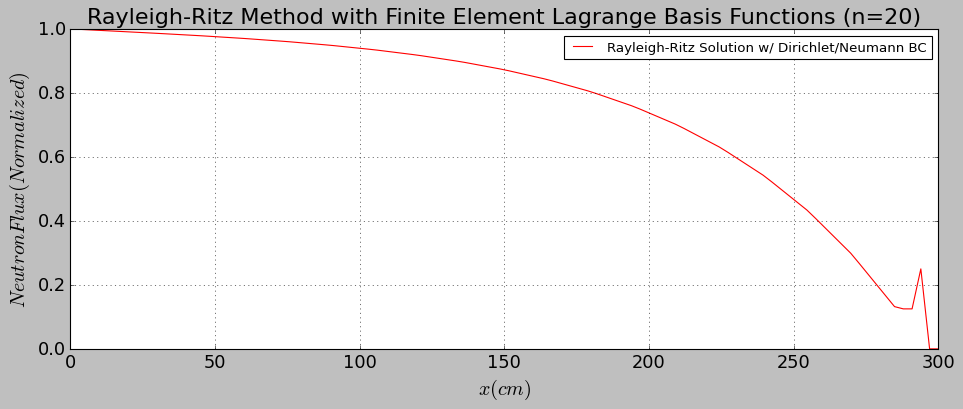

In [18]:
'''Plotting Neutron Flux'''

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x,uvalues, 'r-', label='Rayleigh-Ritz Solution w/ Dirichlet/Neumann BC')

plt.title(r'Rayleigh-Ritz Method with Finite Element Lagrange Basis Functions (n='+str(len(phi_list))+')', fontsize=20)
plt.ylabel(r'$Neutron Flux (Normalized)$', fontsize=18)
plt.xlabel(r'$x (cm)$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [19]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) = ',u_star(x_a), '  u^*_N(b) = ',u_star(x_b), " u^*'_N(b) = ",u_prime_star(x_b))

u^*_N(a) =  [0.]   u^*_N(b) =  [-4.03897e-28]  u^*'_N(b) =  [0.]


In [20]:
'''Flux at boundary'''

print('q_nb computed = ', -diff_coeff*u_prime_star(x_b))
print('q_nb given    = ', q_nb)
print('flux error [%]= ',(-diff_coeff*u_prime_star(x_b) - q_nb)/100)

q_nb computed =  [-0.]
q_nb given    =  -0.5
flux error [%]=  [0.005]


![Domain](/pics/Fplatemooseprofile.png)

In [22]:
'''FEM Solution'''


'FEM Solution'

## [Conclusions](#toc)<a id="conclusions"></a>

The MOOSE app framework developed as part of this work will allow us to further compute and analyze other neutron profiles of slab geometry, such as the MFF.

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [4] author, [reference]()